
# Callin Switzer
Clean the start/stop metadata and save to file


In [22]:
# note that this is missing a step  -- it doesn't start with raw files
# refref -- on pc computer -- first must remove images and then can stack csv's

In [23]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
import re
from datetime import datetime
import sys
import csv
import seaborn as sns
from collections import Counter
from IPython.display import Image

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

last run on 2017-12-08 15:28:56.543875


In [24]:
# define directories
baseDir = os.getcwd()
dataDir = '/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_StartStop'
metadataDir1 = '/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/BeeMetaData/'

In [25]:
baseDir

'/Users/cswitzer/Documents/GitRepos/BeeSonicationLearning'

### Read in metadata

In [26]:
metadataFile = "StartStop_metadata.csv"

# read in data
ssf = pd.read_csv(metadataDir1 + metadataFile, header = 0, index_col = None)

In [27]:
ssf.head()

,timeOfTrial,beeNum,treatment,folder,totalRewards,meanFreqRewarded,totalBuzzesNotRewarded,meanFreqUnrewarded,IT_mm
0,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.200000,4.11
1,2017_05_30__10_15_15,208,RewSec,B_208_2017_05_30_H_7_RewSec,50,338.0,50,344.600000,4.46
2,2017_05_30__10_28_11,209,RewFir,B_209_2017_05_30_H_7_RewFir,50,334.6,50,317.800000,4.40
3,2017_05_30__10_38_21,210,RewFir,B_210_2017_05_30_H_7_RewFir,50,343.6,24,342.500000,4.28
4,2017_05_30__11_12_48,211,RewSec,B_211_2017_05_30_H_8_RewSec,0,NaN,49,376.326531,4.96


### Read in all of the individual CSV's to make a long dataset for analysis

In [31]:
# combine all csv's into a single file
folders = ssf.folder

np_array_list = []
for ii in range(len(folders)):
    tmpDF = pd.read_table(dataDir  + "/" + folders[ii] +  ".csv", header = None, sep = ',')

    np_array_list.append(tmpDF.as_matrix())

    
comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)

big_frame.columns = ['index', 'freq', 'amp', 'datetime', 'rewNum', 'rewTF', 'lowRewAmp', 'highrewAmp', 'BeeNumCol', 'accFile']

print(big_frame.shape) # should be 2360 rows
big_frame.head()

(5851, 10)


,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile
0,1,370,0.79858,2017_05_30__09_52_48_207,1,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_48_207_220_450_0_5.txt
1,2,340,0.68663,2017_05_30__09_52_50_473,2,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_50_473_220_450_0_5.txt
2,3,330,0.34916,2017_05_30__09_52_52_817,3,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_52_817_220_450_0_5.txt
3,4,320,0.66814,2017_05_30__09_52_56_614,4,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_56_614_220_450_0_5.txt
4,5,310,0.90015,2017_05_30__09_52_58_795,5,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_58_795_220_450_0_5.txt


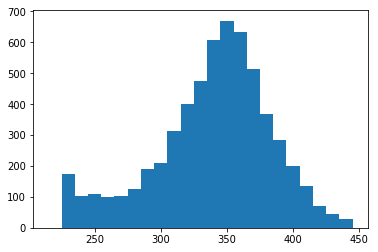

In [32]:
# plot histogram of frequencies
vls = [int(big_frame["freq"][ii]) for ii in range(len(big_frame))]
plt.hist(vls, bins = np.arange(215, 455, 10))
plt.show()

In [33]:
# check to see if datetime and accFile agree
eqs = [big_frame['datetime'][ii][1:25] == big_frame['accFile'][ii][0:24] for ii in range(len(big_frame['datetime']))]

In [34]:
np.sum(np.invert(eqs)) # should be zero if all of them match

0

In [35]:
t2 = big_frame['BeeNumCol'].str.lower()
# remove "b"
t3 = [re.sub('b', '', t2[ii]) for ii in range(len(t2))]
t4 = [t3[ii].split("_")[1] for ii in range(len(t3))]
big_frame["beeID"] = t4




big_frame.head()

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile,beeID
0,1,370,0.79858,2017_05_30__09_52_48_207,1,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_48_207_220_450_0_5.txt,207
1,2,340,0.68663,2017_05_30__09_52_50_473,2,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_50_473_220_450_0_5.txt,207
2,3,330,0.34916,2017_05_30__09_52_52_817,3,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_52_817_220_450_0_5.txt,207
3,4,320,0.66814,2017_05_30__09_52_56_614,4,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_56_614_220_450_0_5.txt,207
4,5,310,0.90015,2017_05_30__09_52_58_795,5,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_58_795_220_450_0_5.txt,207


In [41]:
# get hive
t5 = [t3[ii].split("h")[1] for ii in range(len(t3))]
t6 =  [int(t5[ii].split("_")[1]) for ii in range(len(t5))]
big_frame["hive"] = t6
big_frame.head()

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile,beeID,hive
0,1,370,0.79858,2017_05_30__09_52_48_207,1,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_48_207_220_450_0_5.txt,207,7
1,2,340,0.68663,2017_05_30__09_52_50_473,2,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_50_473_220_450_0_5.txt,207,7
2,3,330,0.34916,2017_05_30__09_52_52_817,3,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_52_817_220_450_0_5.txt,207,7
3,4,320,0.66814,2017_05_30__09_52_56_614,4,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_56_614_220_450_0_5.txt,207,7
4,5,310,0.90015,2017_05_30__09_52_58_795,5,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_58_795_220_450_0_5.txt,207,7


In [42]:
ssf.head()

,timeOfTrial,beeNum,treatment,folder,totalRewards,meanFreqRewarded,totalBuzzesNotRewarded,meanFreqUnrewarded,IT_mm
0,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.200000,4.11
1,2017_05_30__10_15_15,208,RewSec,B_208_2017_05_30_H_7_RewSec,50,338.0,50,344.600000,4.46
2,2017_05_30__10_28_11,209,RewFir,B_209_2017_05_30_H_7_RewFir,50,334.6,50,317.800000,4.40
3,2017_05_30__10_38_21,210,RewFir,B_210_2017_05_30_H_7_RewFir,50,343.6,24,342.500000,4.28
4,2017_05_30__11_12_48,211,RewSec,B_211_2017_05_30_H_8_RewSec,0,NaN,49,376.326531,4.96


In [49]:
# merge metadata
bf2 = big_frame.merge(ssf, left_on =['BeeNumCol'], right_on = ["folder"], how = 'outer', indicator = True)
bf2.loc[40:60, :]

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile,...,timeOfTrial,beeNum,treatment,folder,totalRewards,meanFreqRewarded,totalBuzzesNotRewarded,meanFreqUnrewarded,IT_mm,_merge
40,41,260,0.62628,2017_05_30__09_55_12_772,41,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_12_772_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
41,42,320,1.12243,2017_05_30__09_55_13_281,42,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_13_281_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
42,43,290,0.57858,2017_05_30__09_55_14_242,43,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_14_242_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
43,44,330,0.87679,2017_05_30__09_55_14_805,44,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_14_805_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
44,45,330,0.36798,2017_05_30__09_55_33_328,45,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_33_328_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
45,46,330,0.25051,2017_05_30__09_55_33_982,46,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_33_982_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
46,47,340,0.55554,2017_05_30__09_55_37_241,47,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_37_241_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
47,48,300,0.9326,2017_05_30__09_55_38_221,48,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_38_221_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
48,49,320,0.42963,2017_05_30__09_55_39_706,49,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_39_706_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
49,50,300,0.72979,2017_05_30__09_55_46_972,50,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_55_46_972_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both


In [44]:
# should be 0 rows
bf2.loc[bf2._merge == "right_only", :]

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile,...,timeOfTrial,beeNum,treatment,folder,totalRewards,meanFreqRewarded,totalBuzzesNotRewarded,meanFreqUnrewarded,IT_mm,_merge


In [45]:
Counter(bf2._merge) # should be 5851 for both

Counter({'both': 5851})

In [52]:
bf2 = bf2.rename(index=str, columns={"rewTF": "treatment_rewarded"})
bf2.head()

,index,freq,amp,datetime,rewNum,treatment_rewarded,lowRewAmp,highrewAmp,BeeNumCol,accFile,...,timeOfTrial,beeNum,treatment,folder,totalRewards,meanFreqRewarded,totalBuzzesNotRewarded,meanFreqUnrewarded,IT_mm,_merge
0,1,370,0.79858,2017_05_30__09_52_48_207,1,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_48_207_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
1,2,340,0.68663,2017_05_30__09_52_50_473,2,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_50_473_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
2,3,330,0.34916,2017_05_30__09_52_52_817,3,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_52_817_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
3,4,320,0.66814,2017_05_30__09_52_56_614,4,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_56_614_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both
4,5,310,0.90015,2017_05_30__09_52_58_795,5,F,0,5,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_58_795_220_450_0_5.txt,...,2017_05_30__09_52_37,207,RewSec,B_207_2017_05_30_H_7_RewSec,50,303.8,50,307.2,4.11,both


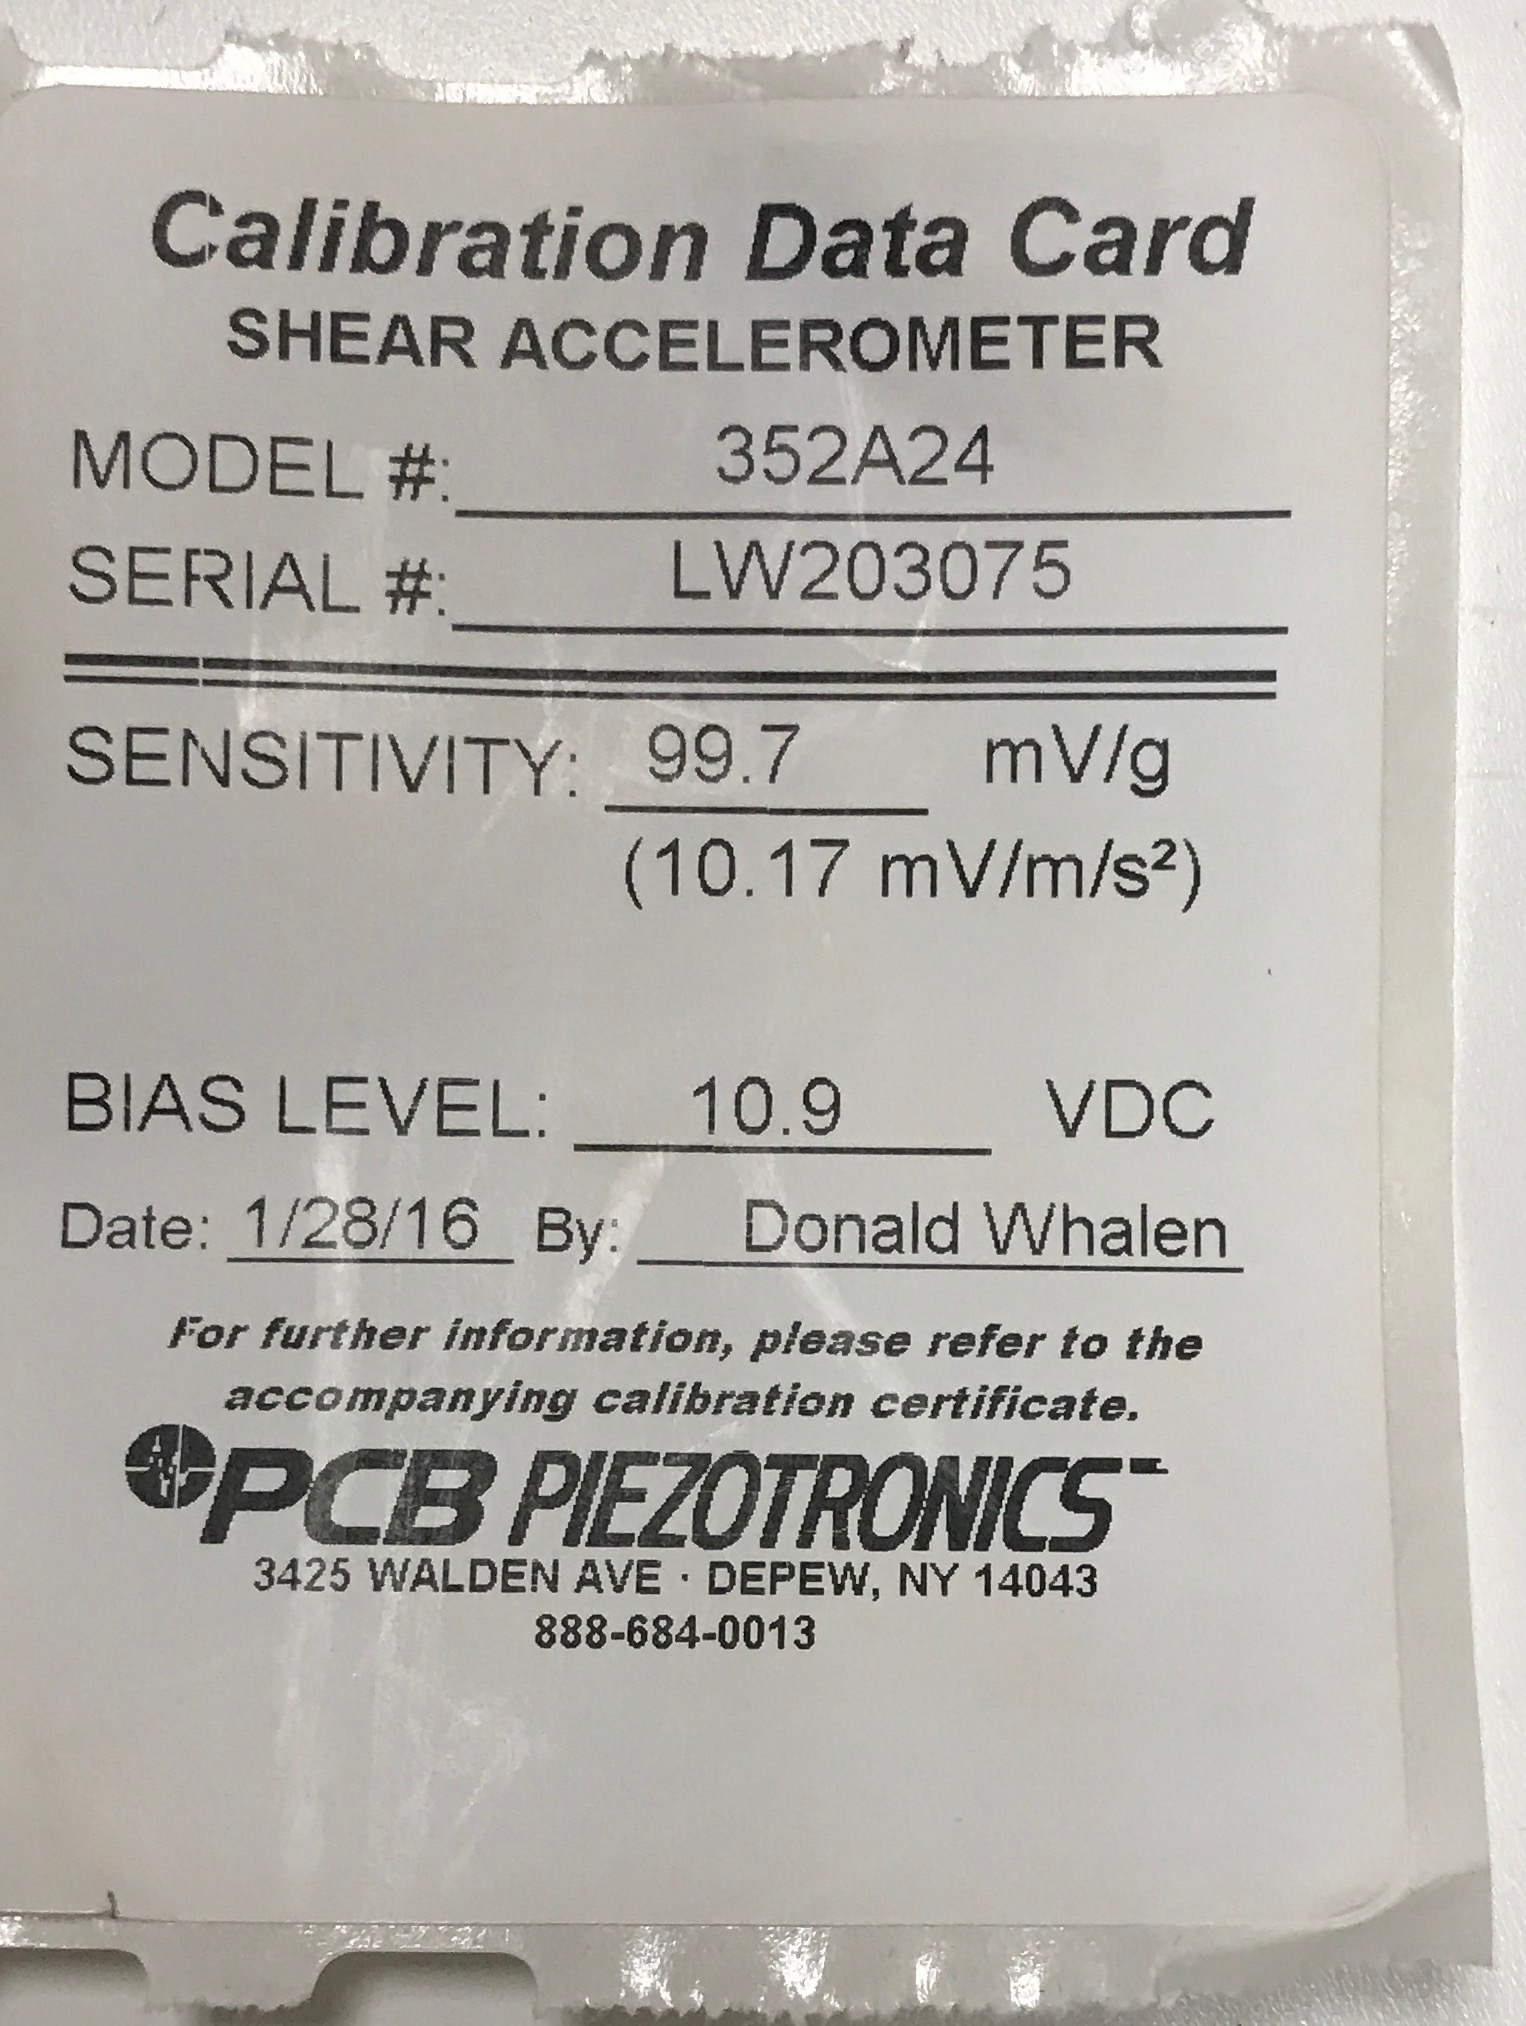

In [53]:
# make new column that shows amplitude of acceleration in m/s/s
#this image shows the calibration for the accelerometer
Image("/Users/cswitzer/Dropbox/SonicationBehavior/accelerometer_calib.jpeg", width = 300)

In [67]:
#drop unwanted columns
bf3 = bf2.drop(["index","_merge", "lowRewAmp", "highrewAmp", "folder", "timeOfTrial", "beeNum"], axis = 1)

# conversion for acceleration (based on image above)
bf3["amp_acc"] = (bf3.amp * 1000.0) / 10.17

bf3.head()

,freq,amp,datetime,rewNum,treatment_rewarded,BeeNumCol,accFile,beeID,hive,treatment,totalRewards,meanFreqRewarded,totalBuzzesNotRewarded,meanFreqUnrewarded,IT_mm,amp_acc
0,370,0.79858,2017_05_30__09_52_48_207,1,F,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_48_207_220_450_0_5.txt,207,7,RewSec,50,303.8,50,307.2,4.11,78.5231
1,340,0.68663,2017_05_30__09_52_50_473,2,F,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_50_473_220_450_0_5.txt,207,7,RewSec,50,303.8,50,307.2,4.11,67.5152
2,330,0.34916,2017_05_30__09_52_52_817,3,F,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_52_817_220_450_0_5.txt,207,7,RewSec,50,303.8,50,307.2,4.11,34.3324
3,320,0.66814,2017_05_30__09_52_56_614,4,F,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_56_614_220_450_0_5.txt,207,7,RewSec,50,303.8,50,307.2,4.11,65.6971
4,310,0.90015,2017_05_30__09_52_58_795,5,F,B_207_2017_05_30_H_7_RewSec,2017_05_30__09_52_58_795_220_450_0_5.txt,207,7,RewSec,50,303.8,50,307.2,4.11,88.5103


In [68]:
# save dataset for analysis
bf3.to_csv('/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/03_StartStop_cleaned.csv', header = True, index = False)

In [62]:
# print system info
import IPython
print(IPython.sys_info())

{'commit_hash': '5a894b9',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Users/cswitzer/anaconda/envs/python3/lib/python3.6/site-packages/IPython',
 'ipython_version': '5.3.0',
 'os_name': 'posix',
 'platform': 'Darwin-17.2.0-x86_64-i386-64bit',
 'sys_executable': '/Users/cswitzer/anaconda/envs/python3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, '
                '13:04:09) \n'
                '[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'}


In [63]:
# show installed packages and versions
!pip freeze 

alabaster==0.7.10
anaconda-client==1.6.3
anaconda-navigator==1.6.2
anaconda-project==0.6.0
appnope==0.1.0
appscript==1.0.1
asn1crypto==0.22.0
astroid==1.4.9
astropy==1.3.2
Babel==2.4.0
backports.functools-lru-cache==1.4
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
blaze==0.10.1
bleach==1.5.0
bokeh==0.12.5
boto==2.46.1
Bottleneck==1.2.1
cffi==1.10.0
chardet==3.0.3
click==6.7
cloudpickle==0.2.2
clyent==1.2.2
colorama==0.3.9
conda==4.3.30
contextlib2==0.5.5
cryptography==1.8.1
cycler==0.10.0
Cython==0.25.2
cytoolz==0.8.2
dask==0.14.3
datashape==0.5.4
decorator==4.0.11
distributed==1.16.3
docutils==0.13.1
entrypoints==0.2.2
et-xmlfile==1.0.1
fastcache==1.0.2
Flask==0.12.2
Flask-Cors==3.0.2
gevent==1.2.1
greenlet==0.4.12
h5py==2.7.1
HeapDict==1.0.0
html5lib==0.999
idna==2.5
imagesize==0.7.1
ipykernel==4.6.1
ipython==5.3.0
ipython-genutils==0.2.0
ipywidgets==6.0.0
isort==4.2.5
itsdangerous==0.24
jdcal==1.3
jedi==0.10.2
Jinja2==2.9.6
jsonschema==2.6.0
jupyte

In [64]:
# convert to html, so ppl don't have to run python to see code
os.chdir(baseDir)
!jupyter nbconvert --to html 006_CleanAndCombineStartStopData

[NbConvertApp] Converting notebook 006_CleanAndCombineStartStopData.ipynb to html
[NbConvertApp] Writing 1161567 bytes to 006_CleanAndCombineStartStopData.html
